<a href="https://colab.research.google.com/github/zerxe/CEIABDAT/blob/main/Act_1_1_Datos_externos_archivos_locales%2C_Drive%2C_Hojas%C2%A0de%C2%A0c%C3%A1lculo_y_Cloud%C2%A0Storage_SinSoluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adolfo Morales Colmenares

24_25


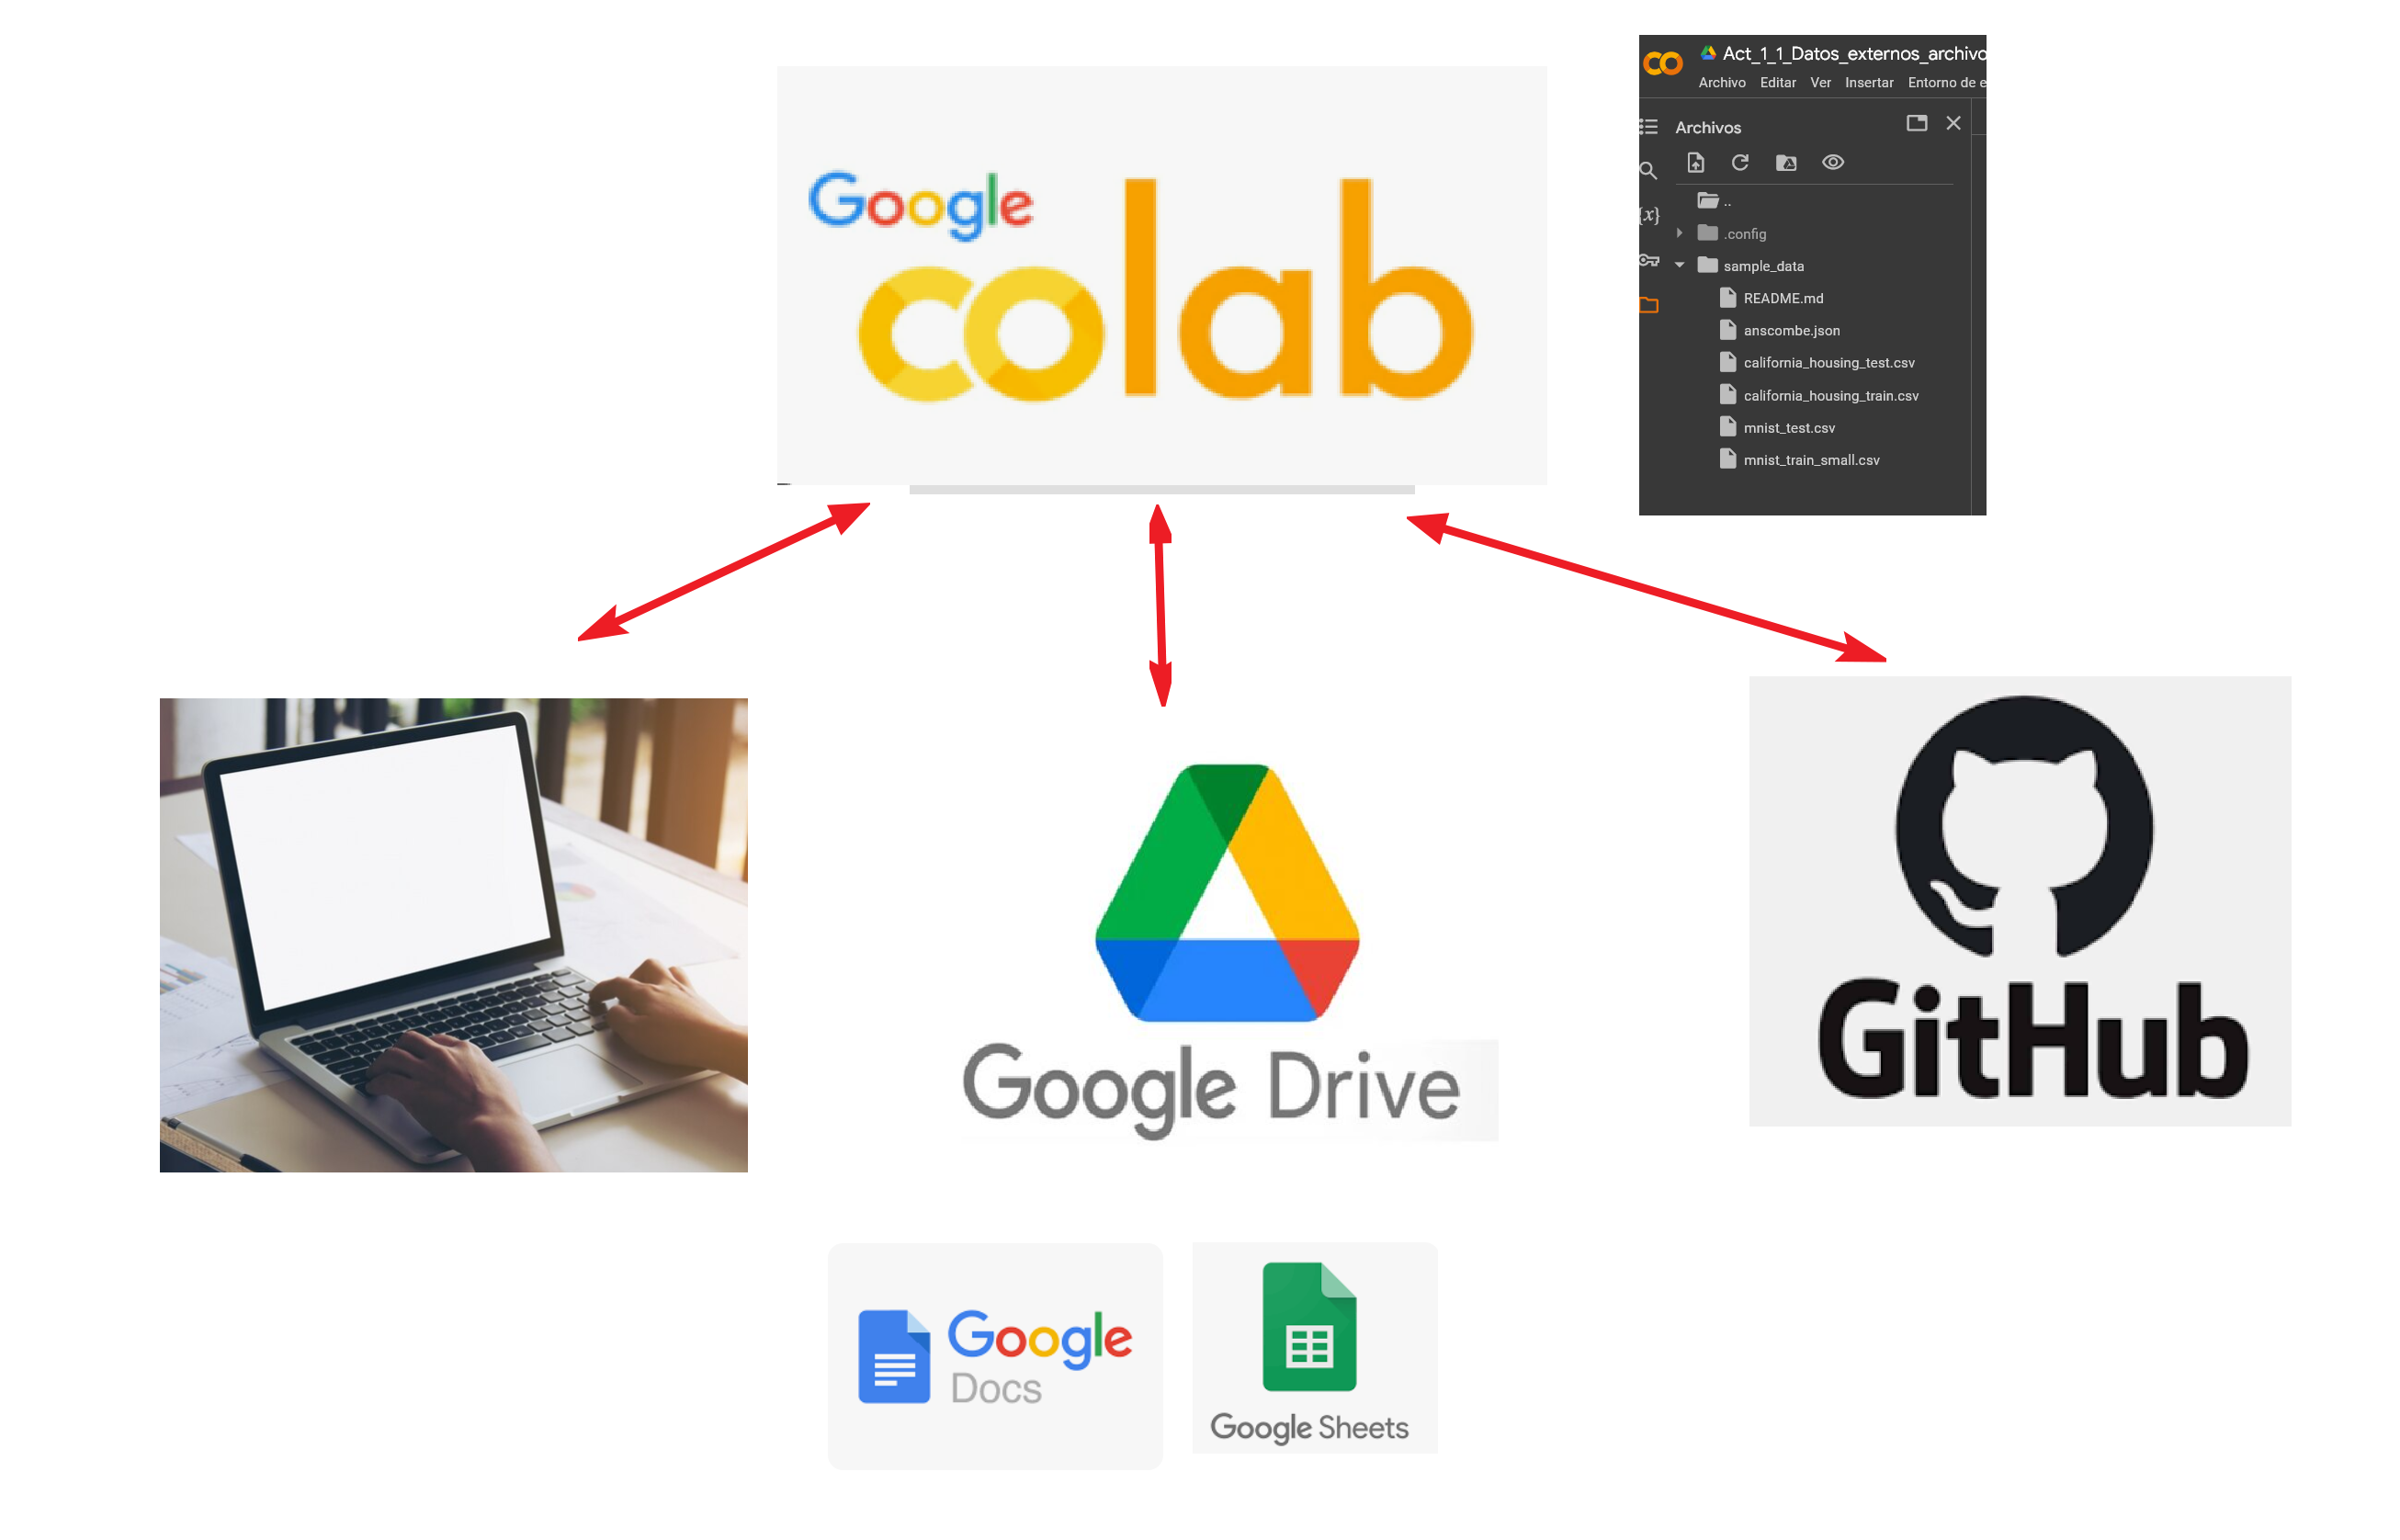

En este cuaderno se ofrecen la siguientes recetas para la creación/subida/descarga de ficheros con diversas librerías:



* Desde el sistema de archivos local de Google Colab
   * Subir/Descargar archivos desde/hacia el sistema de archivos local a Google Colab
   * Descargar archivos en el sistema de archivos local
* Desde Google Drive al entorno de Google Colab
   * Activar(Montar) Google Drive
   * Crear un archivo/directorio en Drive desde Google colab
   * Uso de PyDrive desde Google colab para crear o ver contendos de archvo en Google Drive
* Haciendo uso de API de REST de Drive
   * Desde entorno de Google Colab copia ficheros a Google Drive	y lee su contenido
* Haciendo uso de la librería Google Spread Sheet (gspreed)
   * Crear una hoja de cálculo de Google
   * Acceder al contenido de la hoja de cálculo e insertar datos
   * Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas
* Descargar datos desde GitHub en un dataframe




De todas formas en la siguiente publicación se ofrecen también unas opciones muy interesantes:

Título: [7 ways to load external data into Google Colab](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7)

# Sistema de archivos local de Google Colab

Existe la posibilidad manual de subir o descargar desde el navegador de archivos que ofrece Google colab cuando estamos utilizando un notebook

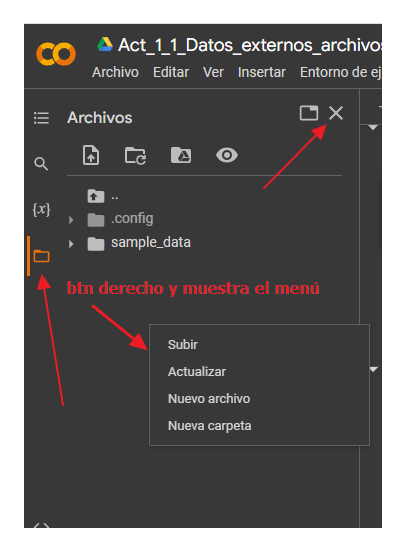

Tener en cuneta que los archivos que se suben durante la ejecución de un notebook, posteriormente se borran al terminar la sesión en la que se han creado.

# Subir ficheros con Python desde el sistema local a los archivos de la sesión del notebook actual

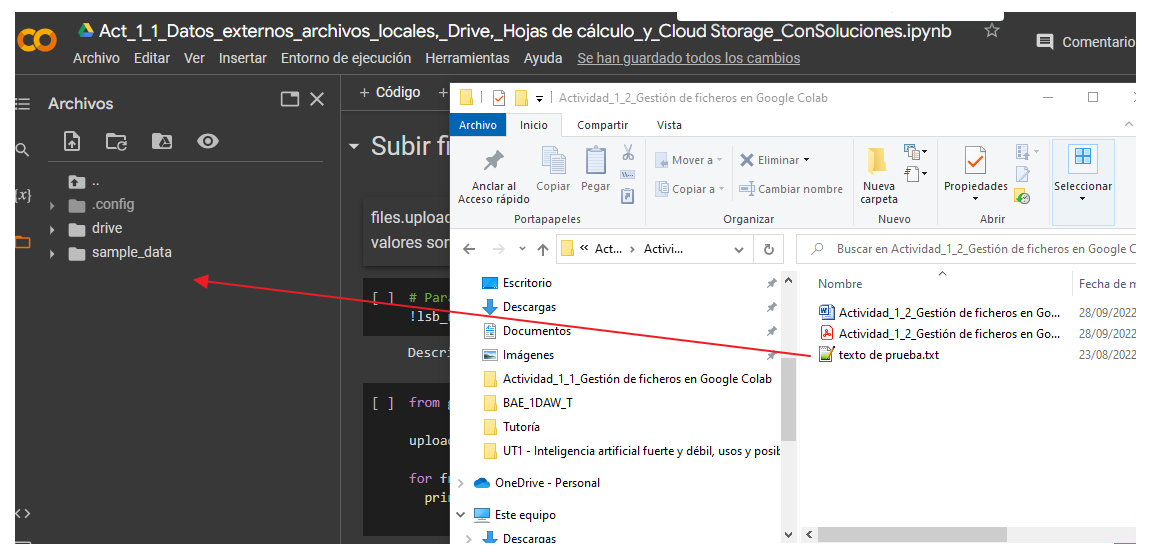

files.upload muestra un diccionario de los archivos que se cargaron. El diccionario está codificado según el nombre de archivo y los valores son los datos que se subieron.

In [ ]:
# Para conocer la versión de Linux donde se ejecuta nuestro cuaderno en Google Colab
!lsb_release -d

Description:	Ubuntu 22.04.3 LTS


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lorem ipsum.txt to Lorem ipsum.txt
User uploaded file "Lorem ipsum.txt" with length 3084 bytes


In [ ]:
#Ejer 01: Crear en el PC un fichero con un contenido de Loren Ipsum y subirlo

## Descargar archivos en el sistema de archivos local

<code>files.download</code> invocará una descarga del archivo desde el navegador a tu PC local.


In [ ]:
from google.colab import files

#with open('Lorem ipsum.txt', 'w') as f:
 # f.write('some content')

files.download('Lorem ipsum.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Ejer 02: Descargar el fichero subido en el apartado anterior (Ejer01)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Google Drive

Puedes acceder a archivos en Drive de varias maneras, incluidas las siguientes:
- Activación de Google Drive en la máquina virtual del entorno de ejecución y conbinarlo con instrucciones de Linux
- Usar un wrapper alrededor de la API, como <a href="https://pythonhosted.org/PyDrive/">PyDrive</a>
- Usar la <a href="https://developers.google.com/drive/v3/web/about-sdk">API nativa de REST</a>



Puedes ver ejemplos de cada caso más abajo.

## Activar (Montar) Google Drive de forma local

El ejemplo siguiente muestra cómo activar/montar Google Drive en el entorno de ejecución mediante un código de autorización y cómo escribir y leer archivos allí. Una vez ejecutado, podrás ver el archivo nuevo &#40;<code>foo.txt</code>&#41; en <a href="https://drive.google.com/">https://drive.google.com/</a>.

Esta configuración solo permite leer, escribir y mover archivos. Para modificar de forma programática la configuración de uso compartido o algún otro metadato, prueba con las opciones de más abajo.

<strong>Nota:</strong> Si utilizas el botón "Activar unidad de Drive" en el navegador de archivos, no necesitas ningún código de autenticación para los notebooks que solo modificó el usuario actual. ***No entiendo esta nota***

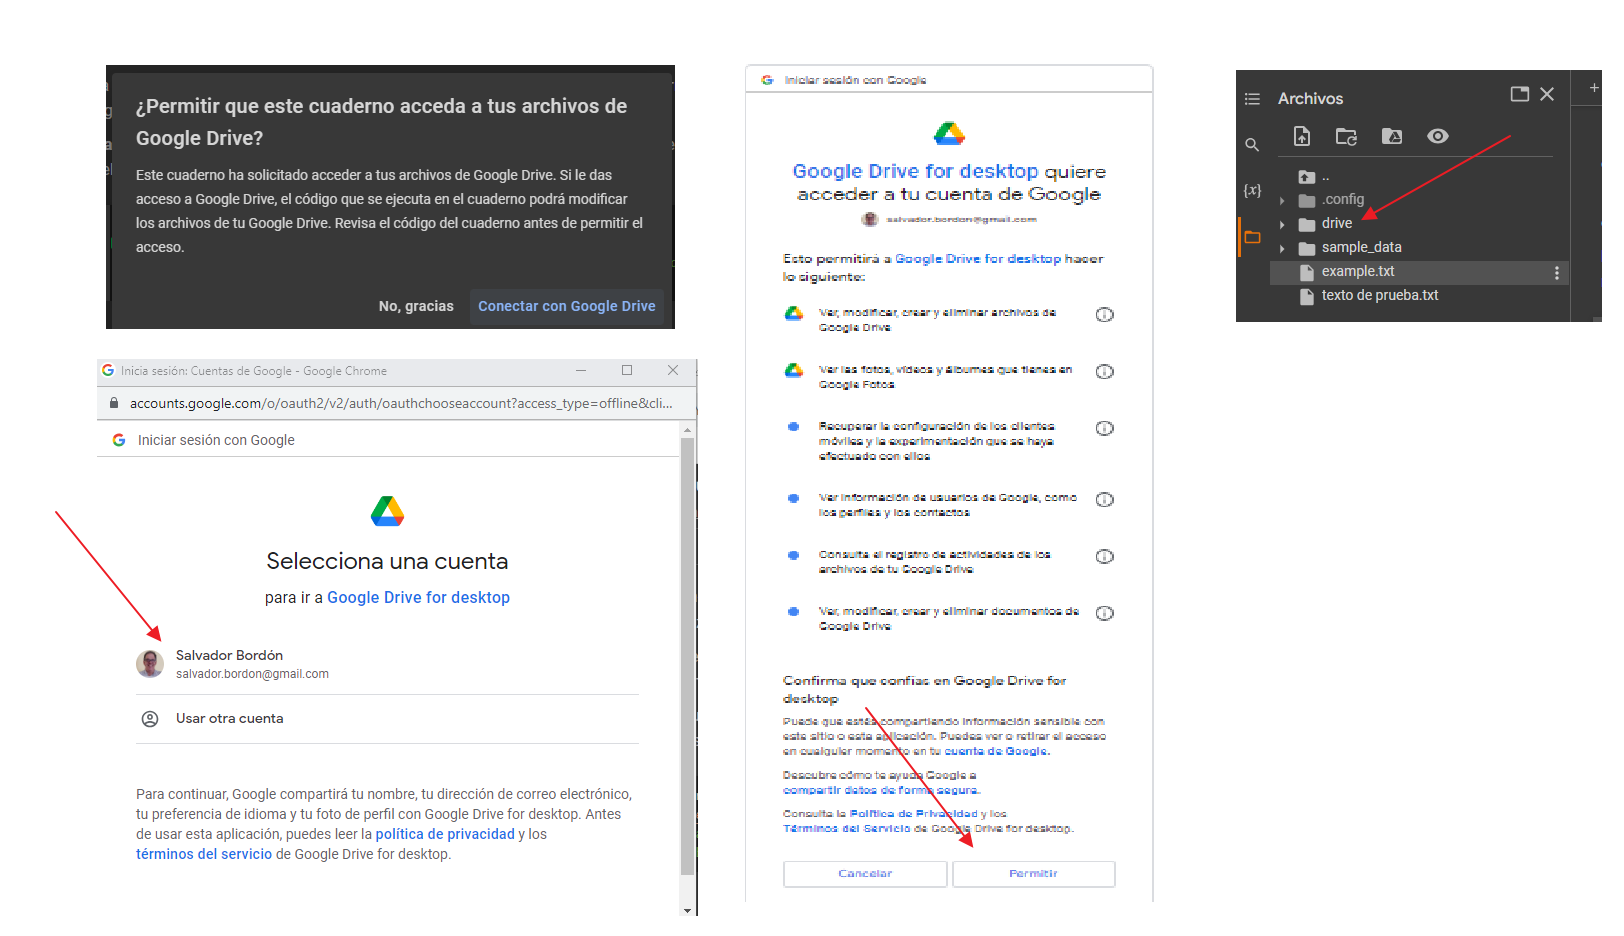

In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   33G   76G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  4.4M  6.4G   1% /var/colab
/dev/sda1        77G   57G   20G  75% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Observar que al montar la carpeta se puede navegar
# en Google Drive desde el explorar de carpetas que
# está a la izquierda en Google Colab

Mounted at /content/drive


In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   33G   76G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  6.5M  6.4G   1% /var/colab
/dev/sda1        77G   57G   20G  75% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   37G   72G  34% /content/drive


In [ ]:
# Aunque reiniciemos el entorno de ejecución la unidad continúa montada

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Crear un fichero en Drive desde Google Colab

 Desde el notebook crear un fichero en Google Drive y ver/leer su contenido con un comando Linux

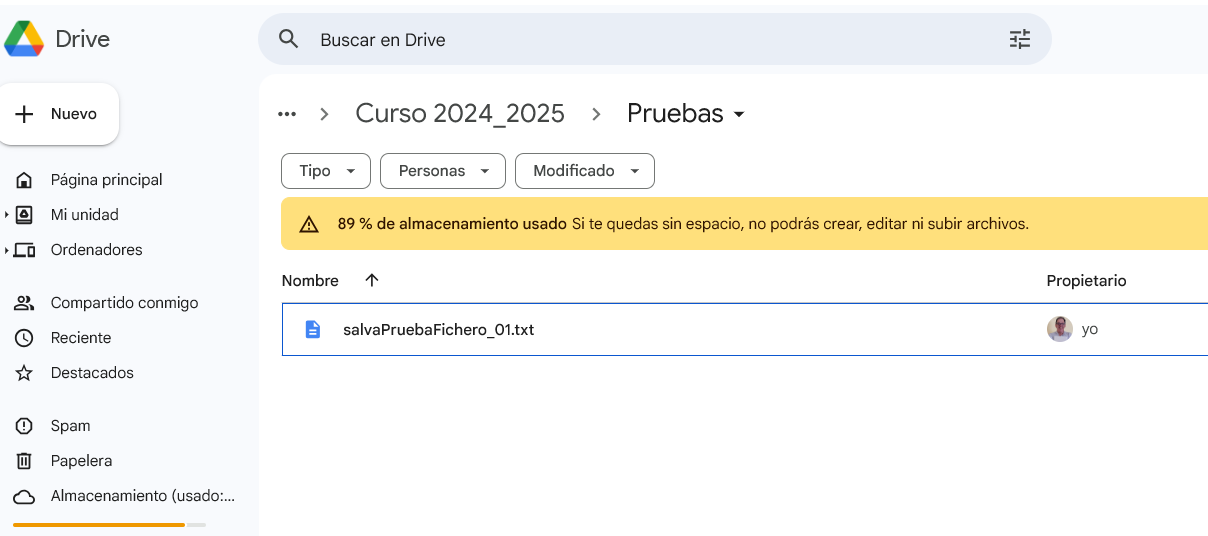

In [ ]:
with open('/content/drive/MyDrive/GoogleColab_test_Ejer_24_25/salvaPruebaFichero_Ejer_3.txt', 'w') as f:

  f.write("Lorem ipsum dolor sit amet.")
  f.write("Consectetur adipiscing elit.")
  f.write("Integer molestie lorem at massa.")
  f.write("Aenean lacinia bibendum nulla sed consectetur.")

!cat '/content/drive/MyDrive/GoogleColab_test_Ejer_24_25/salvaPruebaFichero_Ejer_3.txt'

Lorem ipsum dolor sit amet.Consectetur adipiscing elit.Integer molestie lorem at massa.Aenean lacinia bibendum nulla sed consectetur.

## Desmonta las unidades montadas

Para desmontar las unidades montadas

In [ ]:
drive.flush_and_unmount()

In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   33G   76G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  1.6M  6.4G   1% /var/colab
/dev/sda1        77G   57G   20G  74% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!ls -l

total 12
-rw-r--r-- 1 root root   12 Oct 19 11:10  example.txt
drwxr-xr-x 1 root root 4096 Oct 17 13:21  sample_data
-rw-r--r-- 1 root root  574 Oct 19 11:07 'texto de prueba.txt'


## Crear un directorio en Google Drive

In [ ]:
from google.colab import drive
#drive.flush_and_unmount # Lo utilizo para poder hacer el ejemplo con autonomía de otras celdas

#drive.mount('/content/drive', force_remount=True)

!mkdir '/content/drive/My Drive/GoogleColab_test_Ejer_24_25'



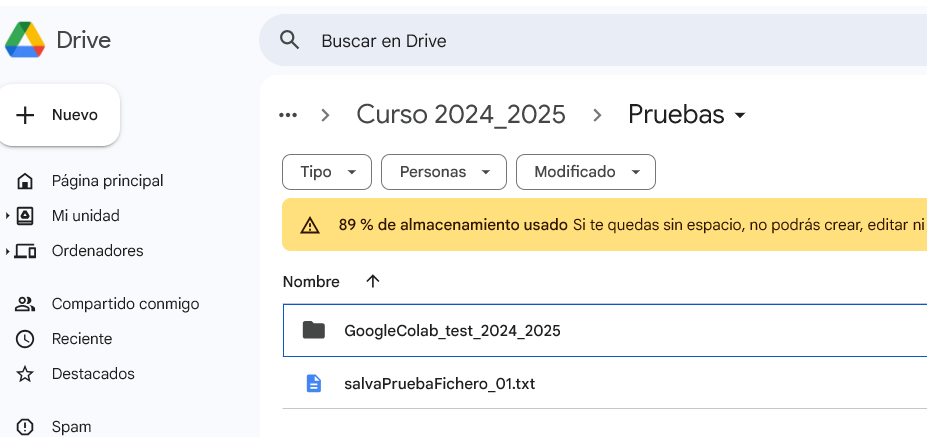

In [ ]:
#Importante: Se recomienda hacer todos los ejercicios tomando como punto de partida el drirectorio raiz de Drive,
#Ejer 03: Crear en drive un directorio llamado GoogleColab_test_Ejer_24_25 y dentro de ella un fichero con un contenido
#      de Loren Ipsum. Consultar/verificar su creación en Google Drive y en el navegador de Google Colab


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function google.colab.drive.flush_and_unmount(timeout_ms=86400000)>

## Uso de PyDrive



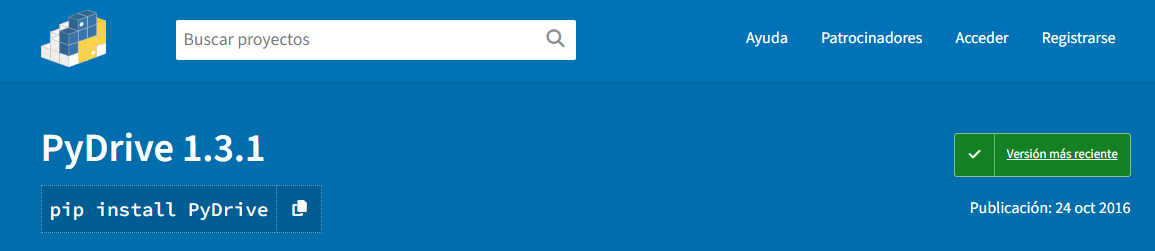

PyDrive es una librería de google-api-python-client que facilita muchas de las tareas habituales de Google Drive API.

**Título**: PyDrive 1.3.1

**UrL**: https://pypi.org/project/PyDrive/


En los ejemplos que aparecen a continuación, se muestran la autenticación y la carga y descarga de archivos mediante PyDrive. Puedes encontrar más ejemplos en la <a href="https://pythonhosted.org/PyDrive/">documentación de PyDrive</a>.

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Autentica y crea el cliente de PyDrive.

Al igual que en la sección anterior, si no tenemos activada la autorización de acceso a Drive, entonces nos la pedirá.


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Crea y sube un archivo de texto.


In [ ]:
# Buscar ID de la carpeta donde se quiere subir el archivo
folderID=""
folderTitle = "GoogleColab_test_Ejer_24_25"

fileList = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file in fileList:
  #print('Title: %s, ID: %s' % (file['title'], file['id']))
  if(file['title'] == folderTitle):
      folderID = file['id']

In [ ]:
uploaded = drive.CreateFile({'title': 'Adolfo_Morales_Colmenares.txt', 'parents': [{'id': folderID}]})
uploaded.SetContentString('Adolfo Morales Colmenares. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus rhoncus tempus leo. Maecenas cursus venenatis metus id condimentum. Mauris vestibulum, sem ac mattis aliquet, lorem augue laoreet erat, quis sodales magna nisl vel eros. Quisque aliquam, leo in laoreet venenatis, justo felis scelerisque eros, tempor rutrum ligula lectus a ante.')
# En este caso lo crea y sube en el directorio seleccionado y guardado en folderID del Drive
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))
print('title: %s, id: %s' % (uploaded['title'], uploaded.get('id')))


Uploaded file with ID 1yCwxXqPeEmtaRpvk5aDLd0OuxtD9aj25
title: Adolfo_Morales_Colmenares.txt, id: 1yCwxXqPeEmtaRpvk5aDLd0OuxtD9aj25


Carga un archivo por su ID y luego imprime su contenido. En este ejemplo utiliza el objeto uploaded de la celda anterior


In [ ]:
file = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(file.GetContentString()))

Downloaded content "Adolfo Morales Colmenares. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus rhoncus tempus leo. Maecenas cursus venenatis metus id condimentum. Mauris vestibulum, sem ac mattis aliquet, lorem augue laoreet erat, quis sodales magna nisl vel eros. Quisque aliquam, leo in laoreet venenatis, justo felis scelerisque eros, tempor rutrum ligula lectus a ante."


In [ ]:
#En este codigo buscamos el archivo subido por la ID en todo el drive incluyendo subcarpetas
fileUpload=[]
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  if file1['mimeType'] == 'application/vnd.google-apps.folder': # Check if it's a folder
    folder_id = file1['id']
    folder_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
    for file2 in folder_list:
      if file2['id'] == uploaded.get('id'):
        fileUpload.append(file2['title'])
        fileUpload.append(file2['id'])
     # print('title2: %s, id: %s' % (file2['title'], file2['id']))
  else:
    if file2['id'] == uploaded.get('id'):
        fileUpload.append(file2['title'])
        fileUpload.append(file2['id'])
    #print('title: %s, id: %s' % (file1['title'], file1['id']))
print(fileUpload)

['Adolfo_Morales_Colmenares.txt', '1yCwxXqPeEmtaRpvk5aDLd0OuxtD9aj25']


In [ ]:
# Para mostrar los directorios/ficheros y sus id's
# Fijarse que el nombre del fichero/directorio se identificaca con "Title"
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
 # if file1['id'] == uploaded.get('id'):
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [ ]:
#Ejer 04: En la carpeta creada en el ejercicio anterior (GoogleColab_test_Ejer_24_25), crear un fichero cuyo nombre sean tu nombre y apellidos,
# en su contenido incluir un texto LorenIpsum distinto al utilizado en el punto anterior (de 50 palabras y añadir tu nombre al principio)
# y al terminar mostrar su contenido.
# Similar al ejemplo. Validar su existencia consultando Gdrive.ListFile  y el explorador de archivos de GoogleColab en este notebook

# Url's de referencia:
#    https://pythonhosted.org/PyDrive/filemanagement.html
#    https://pythonhosted.org/PyDrive/filelist.html#get-all-files-which-matches-the-query
#    https://stackoverflow.com/questions/56434084/google-pydrive-uploading-a-file-to-specific-folder



Downloaded content "Salvador Bordón - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris imperdiet elit ipsum, vel sodales diam tristique a. Ut vitae lorem venenatis, lacinia ex eu, suscipit eros. Vestibulum auctor pellentesque sodales. Donec condimentum tellus vitae turpis tempor molestie. In a ex viverra, luctus ipsum sit amet, auctor ex. Suspendisse nulla nisl."


In [ ]:
#Ejer 05: Mostrar una lista de los ficheros que existen en el directorio GoogleColab_test_Ejer_24_25
# url de referencia: https://pythonhosted.org/PyDrive/quickstart.html#creating-and-updating-file

# Para mi solución utilicé la siguiente publicación: https://stackoverflow.com/questions/40224559/list-of-file-in-a-folder-drive-api-pydrive


In [ ]:
# Usamos el folderID para mostrar el contenido de la carpeta del drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  if file1['mimeType'] == 'application/vnd.google-apps.folder': # Check if it's a folder
    folder_id = file1['id']
    folder_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
    for file2 in folder_list:
      if file1['id'] == folderID:
        print('Archivo: %s, id: %s' % (file2['title'], file2['id']))


Archivo: Adolfo_Morales_Colmenares.txt, id: 1yCwxXqPeEmtaRpvk5aDLd0OuxtD9aj25
Archivo: salvaPruebaFichero_Ejer_3.txt, id: 1-J7n9ERUP6OQijDgyoJkcAUg_kwewXWH
Archivo: .ipynb_checkpoints, id: 1-Ha9CO9mDRUjhUY5-9As5Q0S_Q1NlYNe


## API de REST de Drive




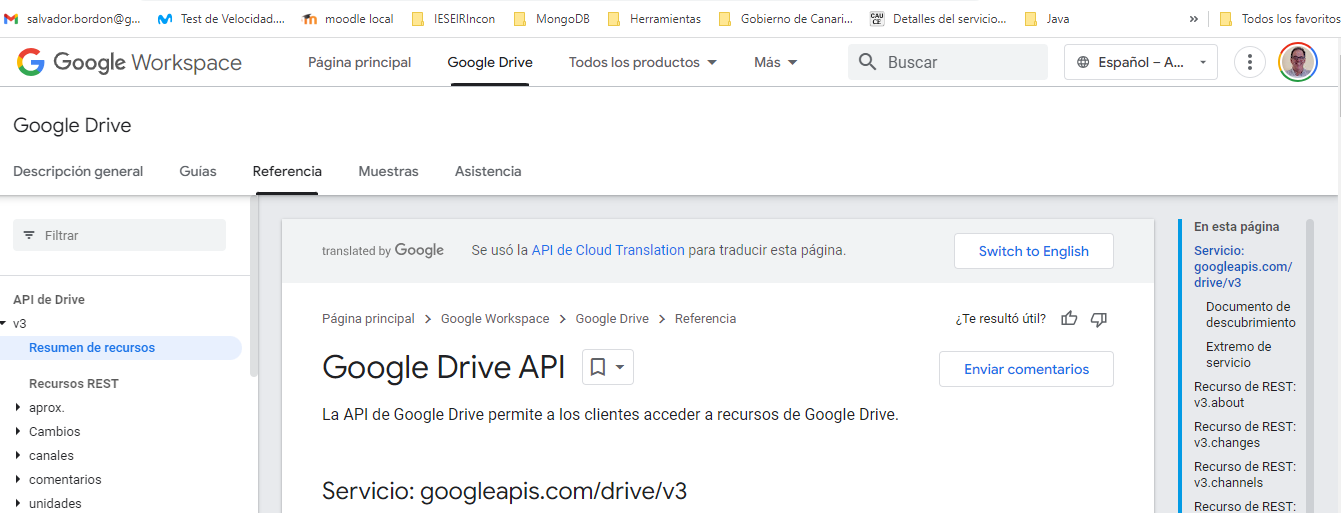

Para usar la API de Drive, primero debemos autenticar y construir un cliente de API.

Al igual que en la sección anterior, si no tenemos activada la autorización de acceso a Drive, entonces nos la pedirá.

In [ ]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

Con este cliente, podemos usar cualquiera de las funciones de la <a href="https://developers.google.com/drive/v3/reference/">referencia de la API de Google Drive</a>. Puedes ver algunos ejemplos debajo.


### Crear un archivo de Drive nuevo con datos de Python

Primero, crea un archivo en el serv idor de Google Colab para poder subirlo/copiarlo después a Google Drive.

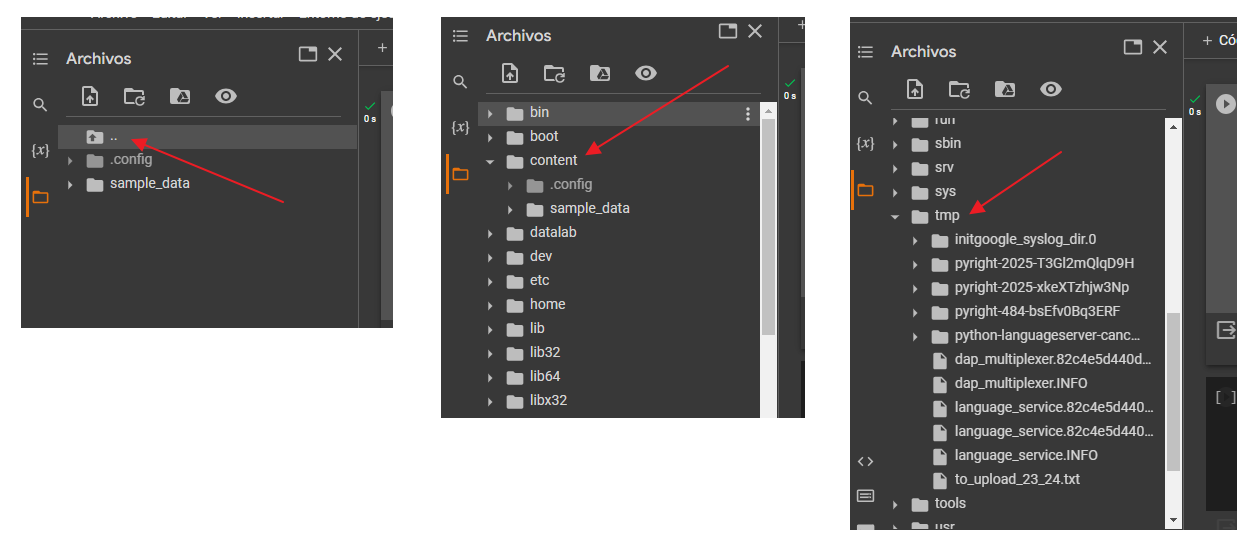

In [ ]:
# No entiendo/veo dónde se está creando este fichero, ya que la carpeta tmp no existe en drive
# Explicación: en el panel navegador de la izquierda pichar en la carpeta con los dos puntos (Ver imágenes superiores)
#              Y se accede a la ruta de archivos de linux; donde se encuentra la carpeta tmp.
# Es en la carpeta content donde se encuentran los ficheros que subimos a Google Colab
# Nota: Una vez que se accede a la carpeta padre y se sube un fichero, lo hará a la carpeta raíz.

# Esta es la forma de crear un fichero desde Python, en este caso en la ruta del servidor de Google colab que le indicamos.

with open('/tmp/to_upload_24_25.txt', 'w') as f:
  f.write('Este año tenemos nuevos retos y casos de uso. Además aula pintada, stores para protegernos de la luz natural, pizarra, más memoria RAM, nuevo infreaestrutura de red, monitores nuevos, algunos swtichs  nuevos de red y mejorada la conectividad desde la mesa del profesorado hay la pizarra digital con switch hdmi 2 entradas 1 salida')

print('/tmp/to_upload_24_25.txt contains:')
!cat /tmp/to_upload_24_25.txt

/tmp/to_upload_24_25.txt contains:
Este año tenemos nuevos retos y casos de uso. Además aula pintada, stores para protegernos de la luz natural, pizarra, más memoria RAM, nuevo infreaestrutura de red, monitores nuevos, algunos swtichs  nuevos de red y mejorada la conectividad desde la mesa del profesorado hay la pizarra digital con switch hdmi 2 entradas 1 salida

Esta sentencias es para  mostrar en Goggle colab la carpeta del Drive, de todas formas si pichas en el icono de la izq. con
el logo de la Carpeta y Drive, entonces te genera este código en una celda de Google Colab.

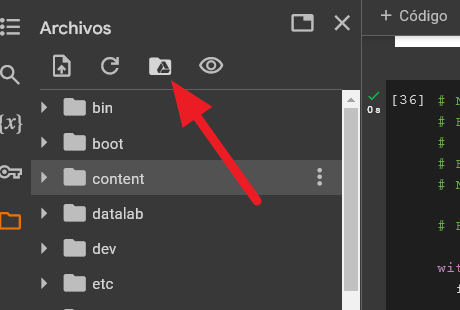

In [ ]:


# No formaba parte de esta sección pero la incluí porque interesaba mostrarla para verificar si se creaba o
# no el fichero de la celda anterior

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sube el archivo anterior a Google Drive, con el nombre "Sample file" ,utilizando el método <a href="https://developers.google.com/drive/v3/reference/files/create"><code>files.create</code></a>. Puedes encontrar más detalles sobre cómo subir archivos en la <a href="https://developers.google.com/drive/v3/web/manage-uploads">documentación para desarrolladores</a>.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from googleapiclient.http import MediaFileUpload


file_metadata = {
  'name': 'Sample file 24_25',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload_24_25.txt',
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

# Es curioso porque una vez que se crea desde este código un archivo de Texto, cunado se intenta modificar desde Drive
# entonces sólo permitirá ver su contenido y si se habre con el editor de Google doc, entonces creará un
# nuevo fichero.


File ID: 1xOjpbu6Cj2_bOzf-Inf8mVYNRNrawJRk


Después de ejecutar la celda anterior, se mostrará un archivo nuevo con el nombre "Sample file" en <a href="https://drive.google.com/">https://drive.google.com/</a>.

Comentar las diferencias **entre los nombres** de los ficheros en el entorno de Google colab y el entorno de Google Drive.

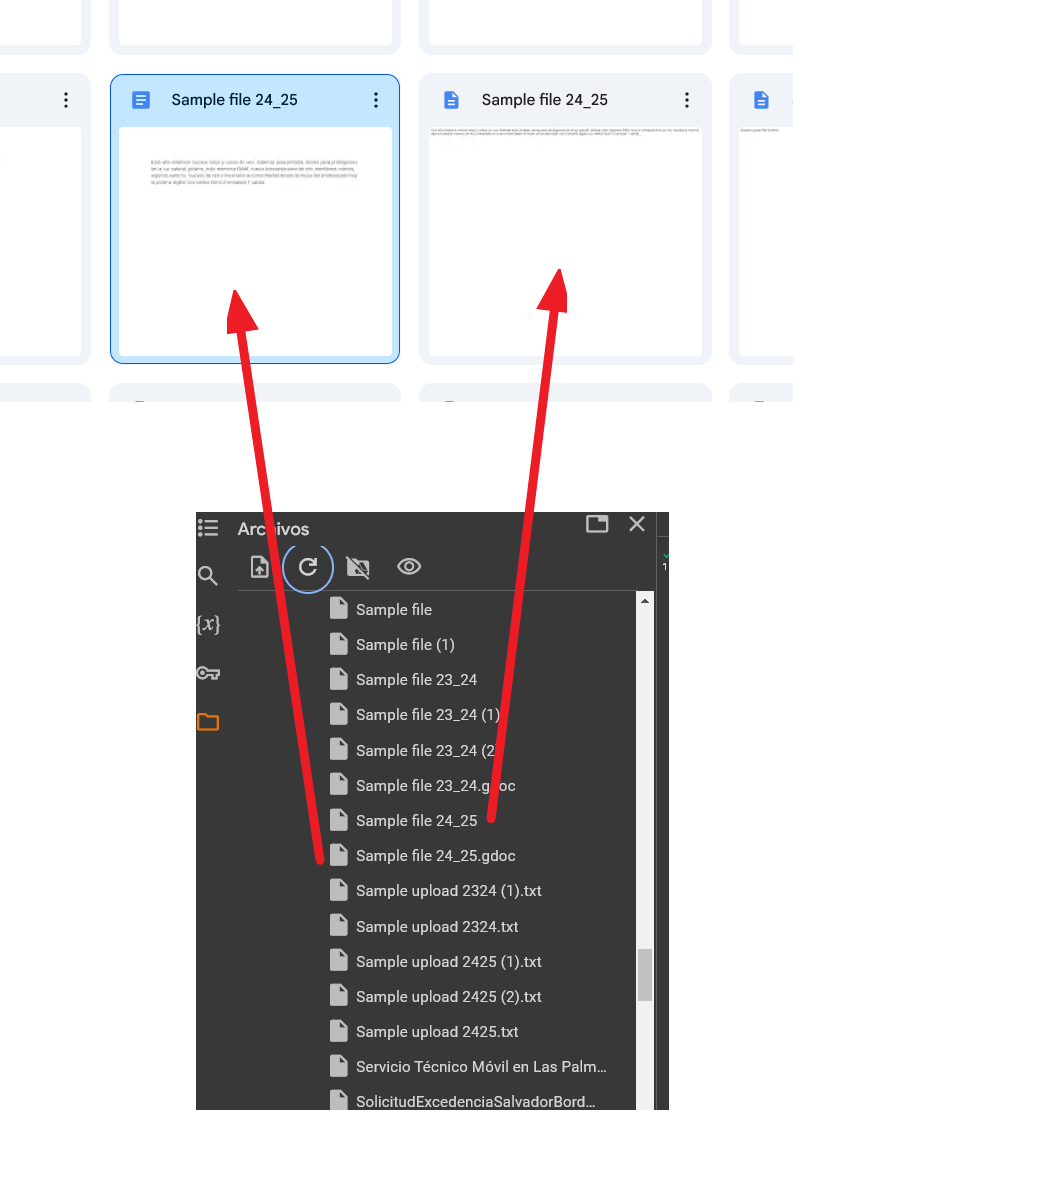



### Descargar datos de un archivo de Drive a un archivo lógico

Descarga el archivo que subimos anteriormente.

In [ ]:
file_id = uploaded.get('id')
import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: b'Adolfo Morales Colmenares. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus rhoncus tempus leo. Maecenas cursus venenatis metus id condimentum. Mauris vestibulum, sem ac mattis aliquet, lorem augue laoreet erat, quis sodales magna nisl vel eros. Quisque aliquam, leo in laoreet venenatis, justo felis scelerisque eros, tempor rutrum ligula lectus a ante.'


Para descargar un archivo diferente, establece el <code>file&#95;id</code> anterior con el ID de ese archivo, que se verá así: "1uBtlaggVyWshwcyP6kEI-y&#95;W3P8D26sz".

In [ ]:
# Ejer 06: Haciendo uso de la api (ejemplo anterior) descargar/mostrar el contenido del fichero que creaste con contenido LorenIpsum
#       en la carpeta GoogleColab_test_Ejer y con el nombre tuyo.



b"111 Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."

# Hojas de cálculo de Google

Los ejemplos de abajo usan la biblioteca de código abierto <a href="https://github.com/burnash/gspread"><code>gspread</code></a> para interactuar con Hojas de cálculo de Google.

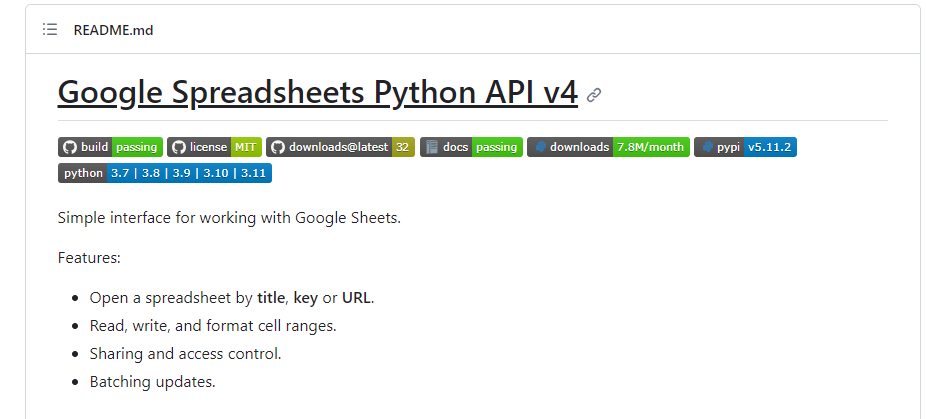

Importa la biblioteca, autentica y crea la interfaz para Hojas de cálculo.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

A continuación, verás un pequeño conjunto de ejemplos de <code>gspread</code>. Puedes encontrar más ejemplos en la <a href="https://github.com/burnash/gspread#more-examples">página de GitHub de <code>gspread</code></a>.

## Crear una hoja nueva con datos de Python

In [ ]:
# Crea la hoja de cálcula en el directorio raíz de Google Drive
sh = gc.create('Adolfo_Morales_Colmenares_spreadsheet_24_25')

Después de ejecutar la celda anterior, se mostrará una nueva hoja de cálculo con el nombre "My cool spreadsheet" en <a href="https://sheets.google.com/">https://sheets.google.com</a>.

Abre la hoja nueva y agrega datos aleatorios.

In [ ]:
worksheet = gc.open('Adolfo_Morales_Colmenares_spreadsheet_24_25').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1yccokpJJemVsqZjx9__SSxXD-xjV_tO49lN_TGBJXTg',
 'updatedRange': "'Hoja 1'!A1:C2",
 'updatedRows': 2,
 'updatedColumns': 3,
 'updatedCells': 6}

## Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas

Vuelve a leer los datos aleatorios que insertamos anteriormente y convierte el resultado en un <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">DataFrame de Pandas</a>.

In [ ]:
worksheet = gc.open('My cool spreadsheet_24_25').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
df_Example01 = pd.DataFrame.from_records(rows)

[['2', '7', '9'], ['3', '4', '3']]


# Descargar datos desde GitHub en un dataframe

In [ ]:
import pandas as pd
# Importación de los datos

repositorio = 'https://raw.githubusercontent.com/zerxe/CEIABDAT/refs/heads/main/SNS/bikes.csv'

df_train_bikes = pd.read_csv(repositorio)

In [ ]:
df_train_bikes

,date;temperature;humidity;windspeed;count
0,2011-01-03;2.716069662931224;45.71534591259640...
1,2011-01-04;2.8966732970082774;54.2672190231362...
2,2011-01-05;4.23565354008174;45.69770190231361;...
3,2011-01-06;3.1126426592104286;50.2373494087403...
4,2011-01-07;2.7239176756331425;49.1449283290488...
...,...
724,2012-12-27;5.587200537671569;57.75593120822622...
725,2012-12-28;5.545774951637392;54.24293059125964...
726,2012-12-29;4.924887870789437;54.01028277634962...
727,2012-12-30;4.304000789941483;53.7776349614396;...


In [ ]:
import pandas as pd
# Importación de los datos

repositorio = 'https://raw.githubusercontent.com/SalvadorBR/SNS_23_24_Act1_1/main/APARCAMIENTOS-MAYO-2023.csv'

df_train_sagulpa = pd.read_csv(repositorio)

In [ ]:
df_train_sagulpa

,APARCAMIENTO,EventTime,EventDesc
0,VEGUETA,01/05/2023 0:00,ENTRADA
1,VEGUETA,01/05/2023 0:00,SALIDA
2,VEGUETA,01/05/2023 0:01,SALIDA
3,VEGUETA,01/05/2023 0:06,ENTRADA
4,VEGUETA,01/05/2023 0:32,SALIDA
...,...,...,...
295421,SAN BERNARDO,21/05/2023 11:38,ENTRADA
295422,SAN BERNARDO,21/05/2023 13:06,SALIDA
295423,SAN BERNARDO,21/05/2023 13:34,ENTRADA
295424,SAN BERNARDO,28/05/2023 6:34,SALIDA


In [ ]:
# Ejer 07: Subir a un repositorio de GitHub una hoja de cálculo en formato csv y realizar la importanción a un dataframe,
# utilizando como separador de campos un "punto y coma" ;


In [ ]:
df_train_sagulpa_v2

,APARCAMIENTO,EventTime,EventDesc
0,VEGUETA,01/05/2023 0:00,ENTRADA
1,VEGUETA,01/05/2023 0:00,SALIDA
2,VEGUETA,01/05/2023 0:01,SALIDA
3,VEGUETA,01/05/2023 0:06,ENTRADA
4,VEGUETA,01/05/2023 0:32,SALIDA
...,...,...,...
295421,SAN BERNARDO,21/05/2023 11:38,ENTRADA
295422,SAN BERNARDO,21/05/2023 13:06,SALIDA
295423,SAN BERNARDO,21/05/2023 13:34,ENTRADA
295424,SAN BERNARDO,28/05/2023 6:34,SALIDA
